In [41]:
import pandas as pd
import numpy as np

# Câu 1: Đọc và hiển thị thông tin từ file vnstock_listing_companies.csv
def doc_du_lieu_cong_ty():
    """
    a. In ra danh sách các cột và kiểu dữ liệu tương ứng
    b. In ra 10 dòng đầu tiên, chỉ hiển thị các cột số
    """
    # Đọc file CSV
    df = pd.read_csv('vnstock_listing_companies.csv')
    
    # a. In ra thông tin về các cột và kiểu dữ liệu
    print("1a. Thông tin về các cột và kiểu dữ liệu:")
    print(df.dtypes)
    print("\n")
    
    # b. Lọc các cột kiểu số và hiển thị 10 dòng đầu
    # Lấy tên các cột có kiểu dữ liệu là số
    cot_so = df.select_dtypes(include=['int64', 'float64']).columns
    print("1b. 10 dòng đầu tiên với các cột số:")
    print(df[cot_so].head(10))
    
    return df

# Test câu 1
df_companies = doc_du_lieu_cong_ty()

1a. Thông tin về các cột và kiểu dữ liệu:
ticker               object
exchange             object
shortName            object
industry             object
industryEn           object
establishedYear     float64
noEmployees         float64
noShareholders      float64
foreignPercent      float64
website              object
stockRating         float64
outstandingShare    float64
issueShare          float64
companyType          object
monthlyRecords       object
dtype: object


1b. 10 dòng đầu tiên với các cột số:
   establishedYear  noEmployees  noShareholders  foreignPercent  stockRating  \
0           1980.0        666.0           583.0           0.002          2.8   
1           2000.0          0.0           395.0           0.003          2.6   
2           2001.0        795.0           749.0           0.271          2.8   
3           2003.0        612.0          1228.0           0.259          2.9   
4           2003.0         21.0          1452.0           0.003          NaN   
5    

In [42]:
df_companies

,ticker,exchange,shortName,industry,industryEn,establishedYear,noEmployees,noShareholders,foreignPercent,website,stockRating,outstandingShare,issueShare,companyType,monthlyRecords
0,CMV,HOSE,Thương nghiệp Cà Mau,Bán lẻ,Retail,1980.0,666.0,583.0,0.002,http://www.tncm.com.vn,2.8,18.2,18.2,CT,CMV.csv
1,COM,HOSE,Vật tư Xăng dầu,Bán lẻ,Retail,2000.0,0.0,395.0,0.003,http://comeco.vn,2.6,14.1,14.1,CT,COM.csv
2,DHT,HNX,Dược phẩm Hà Tây,Bán lẻ,Retail,2001.0,795.0,749.0,0.271,http://www.hataphar.com.vn,2.8,26.4,26.4,CT,DHT.csv
3,DGW,HOSE,Thế Giới Số,Bán lẻ,Retail,2003.0,612.0,1228.0,0.259,https://digiworld.com.vn,2.9,163.1,163.2,CT,DGW.csv
4,TTH,HNX,TM và DV Tiến Thành,Bán lẻ,Retail,2003.0,21.0,1452.0,0.003,http://www.tienthanhjsc.vn,NaN,37.4,37.4,CT,TTH.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,VAV,UPCOM,VIWACO,"Điện, nước & xăng dầu khí đốt",Utilities,2015.0,216.0,100.0,0.022,https://viwaco.vn,2.8,32.0,32.0,CT,VAV.csv
1151,VPD,HOSE,Phát triển Điện lực Việt Nam,"Điện, nước & xăng dầu khí đốt",Utilities,2015.0,128.0,6862.0,0.001,http://www.vnpd.com.vn,3.0,106.6,106.6,CT,VPD.csv
1152,NTH,HNX,Thủy điện Nước Trong,"Điện, nước & xăng dầu khí đốt",Utilities,2015.0,29.0,148.0,0.000,http://www.thuydiennuoctrong.com.vn,NaN,10.8,10.8,CT,NTH.csv
1153,PPT,UPCOM,Petro Times,"Điện, nước & xăng dầu khí đốt",Utilities,2015.0,0.0,307.0,0.000,https://petrotimesgroup.com,NaN,15.0,8.0,CT,PPT.csv


In [43]:
# Câu 2: Viết hàm find_stock để tìm mã cổ phiếu X dựa vào MSSV
def find_stock(mssv):
    """
    Tìm mã cổ phiếu dựa trên MSSV với các quy tắc:
    - Lấy 4 số cuối của MSSV, chia lấy dư cho 500
    - Nếu kết quả là số chẵn: lấy mã cổ phiếu có số thứ tự là kết quả
    - Nếu kết quả là số lẻ: lấy mã cổ phiếu đứng trước vị trí của kết quả
    - Nếu kết quả là 0: lấy mã cổ phiếu cuối cùng
    """
    # Đọc file danh sách công ty
    df = pd.read_csv('vnstock_listing_companies.csv')
    
    # Lấy 4 số cuối của MSSV
    bon_so_cuoi = int(str(mssv)[-4:])
    
    # Tính vị trí dựa trên phép chia dư cho 500
    vi_tri = bon_so_cuoi % 500
    
    # Xử lý các trường hợp theo quy tắc
    if vi_tri == 0:
        # Trường hợp chia hết cho 500
        return df.iloc[-1]['ticker']
    elif vi_tri % 2 == 0:
        # Trường hợp số chẵn
        return df.iloc[vi_tri]['ticker']
    else:
        # Trường hợp số lẻ
        return df.iloc[vi_tri - 1]['ticker']

# Test hàm với ví dụ trong đề bài
mssv_test = 5678
ma_co_phieu = find_stock(mssv_test)
print(f"Với MSSV {mssv_test}:")
print(f"4 số cuối: {str(mssv_test)[-4:]}")
print(f"Vị trí sau khi chia 500: {int(str(mssv_test)[-4:]) % 500}")
print(f"Mã cổ phiếu được chọn: {ma_co_phieu}")

Với MSSV 5678:
4 số cuối: 5678
Vị trí sau khi chia 500: 178
Mã cổ phiếu được chọn: VNG


In [44]:
# Câu 3: Hiển thị chi tiết thông tin của cổ phiếu X
def hien_thi_thong_tin_co_phieu(ma_co_phieu):
    """
    Hiển thị thông tin chi tiết của cổ phiếu X bao gồm:
    - ticker
    - shortName
    - sector
    - monthlyRecords
    """
    # Đọc file danh sách công ty
    df = pd.read_csv('vnstock_listing_companies.csv')
    
    # Lọc thông tin của cổ phiếu X
    thong_tin = df[df['ticker'] == ma_co_phieu][['ticker', 'shortName', 'industry', 'monthlyRecords']]
    
    print(f"Thông tin chi tiết của cổ phiếu {ma_co_phieu}:")
    print(thong_tin.to_string(index=False))
    
    return thong_tin

# Test với mã cổ phiếu từ câu 2
thong_tin_co_phieu = hien_thi_thong_tin_co_phieu(ma_co_phieu)
thong_tin_co_phieu

Thông tin chi tiết của cổ phiếu VNG:
ticker           shortName            industry monthlyRecords
   VNG DL Thành Thành Công Du lịch và Giải trí        VNG.csv


,ticker,shortName,industry,monthlyRecords
178,VNG,DL Thành Thành Công,Du lịch và Giải trí,VNG.csv


In [45]:
def thong_ke_mo_rong(df_path=f'data_2023/transaction/{ma_co_phieu}.csv'):
    """
    Tính toán các thống kê từ tháng 7 đến tháng 9 năm 2023:
    - Tổng giá trị giao dịch hàng ngày (Volume * Close)
    - Giá Close trung bình cho từng tháng
    - Tỷ lệ thay đổi phần trăm hàng tháng của giá Close
    """
    # Đọc dữ liệu
    df = pd.read_csv(df_path)
    df['time'] = pd.to_datetime(df['time'])
    
    # Lọc dữ liệu từ tháng 7 đến tháng 9/2023
    mask = (df['time'] >= '2023-07-01') & (df['time'] <= '2023-09-30')
    df_filtered = df.loc[mask]
    
    # 1. Tính tổng giá trị giao dịch hàng ngày
    df_filtered['trading_value'] = df_filtered['volume'] * df_filtered['close']
    
    # 2. Tính giá Close trung bình theo tháng
    monthly_close = df_filtered.groupby(df_filtered['time'].dt.month)['close'].mean()
    
    # 3. Tính tỷ lệ thay đổi hàng tháng
    monthly_pct_change = monthly_close.pct_change() * 100
    
    print("\n=== THỐNG KÊ MỞ RỘNG CỔ PHIẾU VNG (7-9/2023) ===")
    
    print("\n1. Giá trị giao dịch hàng ngày:")
    print("   Ngày           Giá trị giao dịch")
    print("   ----------------------------------")
    for idx, row in df_filtered.iterrows():
        print(f"   {row['time'].strftime('%Y-%m-%d')}: {row['trading_value']:,.0f} VND")
        
    print("\n2. Giá đóng cửa trung bình theo tháng:")
    for month, value in monthly_close.items():
        print(f"   Tháng {month}: {value:,.0f} VND")
    
    print("\n3. Tỷ lệ thay đổi giá đóng cửa theo tháng:")
    for month, value in monthly_pct_change.items():
        if not np.isnan(value):
            print(f"   Tháng {month}: {value:.2f}%")
    
    # Thống kê thêm
    print("\nThống kê bổ sung:")
    print(f"Tổng số phiên giao dịch: {len(df_filtered)}")
    print(f"Tổng giá trị giao dịch: {df_filtered['trading_value'].sum():,.0f} VND")
    print(f"Giá trị giao dịch trung bình/ngày: {df_filtered['trading_value'].mean():,.0f} VND")
    
    return df_filtered

# Thực hiện phân tích
df_thong_ke = thong_ke_mo_rong()
df_thong_ke


=== THỐNG KÊ MỞ RỘNG CỔ PHIẾU VNG (7-9/2023) ===

1. Giá trị giao dịch hàng ngày:
   Ngày           Giá trị giao dịch
   ----------------------------------
   2023-07-03: 157,080,000 VND
   2023-07-04: 378,420,000 VND
   2023-07-05: 158,620,000 VND
   2023-07-06: 77,140,000 VND
   2023-07-07: 144,704,000 VND
   2023-07-10: 102,382,000 VND
   2023-07-11: 173,360,000 VND
   2023-07-12: 73,425,000 VND
   2023-07-13: 96,426,000 VND
   2023-07-14: 95,040,000 VND
   2023-07-17: 204,459,000 VND
   2023-07-18: 299,150,000 VND
   2023-07-19: 265,309,000 VND
   2023-07-20: 106,493,000 VND
   2023-07-21: 363,258,000 VND
   2023-07-24: 395,038,000 VND
   2023-07-25: 506,391,000 VND
   2023-07-26: 537,864,000 VND
   2023-07-27: 217,440,000 VND
   2023-07-28: 608,548,000 VND
   2023-07-31: 504,060,000 VND
   2023-08-01: 388,960,000 VND
   2023-08-02: 151,680,000 VND
   2023-08-03: 528,255,000 VND
   2023-08-04: 156,870,000 VND
   2023-08-07: 272,490,000 VND
   2023-08-08: 218,080,000 VND
   2023-08

C:\Users\kieno\AppData\Local\Temp\ipykernel_14404\3433630134.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['trading_value'] = df_filtered['volume'] * df_filtered['close']


,time,open,high,low,close,volume,ticker,trading_value
122,2023-07-03,10500,10500,10100,10200,15400,VNG,157080000
123,2023-07-04,10200,10250,10000,10200,37100,VNG,378420000
124,2023-07-05,10200,10300,10000,10300,15400,VNG,158620000
125,2023-07-06,10250,10250,9950,10150,7600,VNG,77140000
126,2023-07-07,10100,10100,9520,9520,15200,VNG,144704000
...,...,...,...,...,...,...,...,...
180,2023-09-25,8690,8860,8600,8840,29100,VNG,257244000
181,2023-09-26,8840,8840,8550,8800,17700,VNG,155760000
182,2023-09-27,8800,8800,8650,8780,39800,VNG,349444000
183,2023-09-28,8650,8800,8650,8770,15000,VNG,131550000



Thống kê Info01 (So sánh Close - Open):
Số phiên tăng: 26
Số phiên giảm: 35
Số phiên đứng giá: 2

Thống kê Info02 (So sánh với phiên trước):
Số phiên tăng: 23
Số phiên giảm: 32
Số phiên đứng giá: 8

Volume trung bình: 29,494
Số phiên vượt TB: 27

Thống kê giá:
Số phiên giao dịch: 63
Giá đóng cửa trung bình: 9,275
Giá đóng cửa cao nhất: 10,300
Giá đóng cửa thấp nhất: 8,770

Kết quả phân tích hồi quy:
Hệ số hồi quy:
Volume: -0.0015
Open: -0.2675
High: 0.5053
Low: 0.7621
R-squared: 0.9616

Thống kê các cụm:

Cụm 1:
Số lượng phiên: 22
Giá trung bình: 9,395
Volume trung bình: 40,809

Cụm 2:
Số lượng phiên: 28
Giá trung bình: 8,895
Volume trung bình: 26,975

Cụm 3:
Số lượng phiên: 13
Giá trung bình: 9,888
Volume trung bình: 15,769


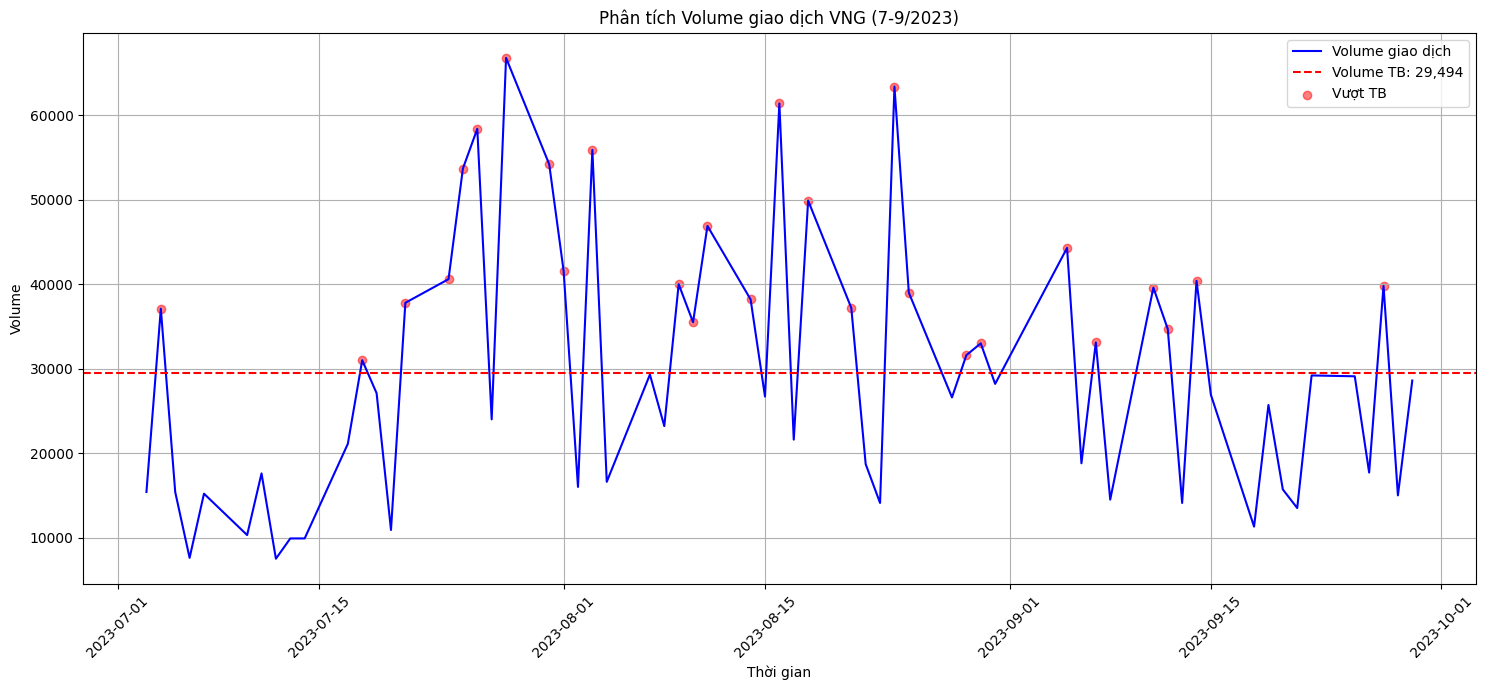

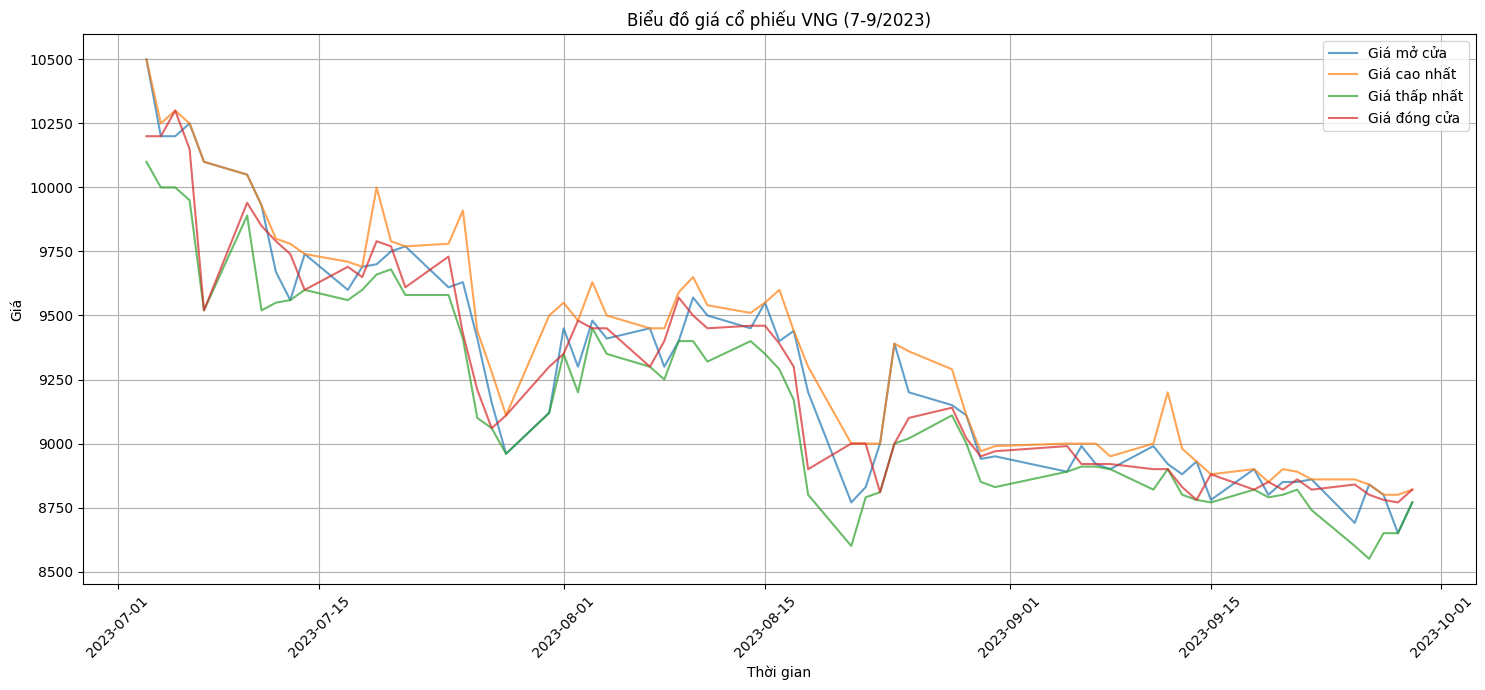

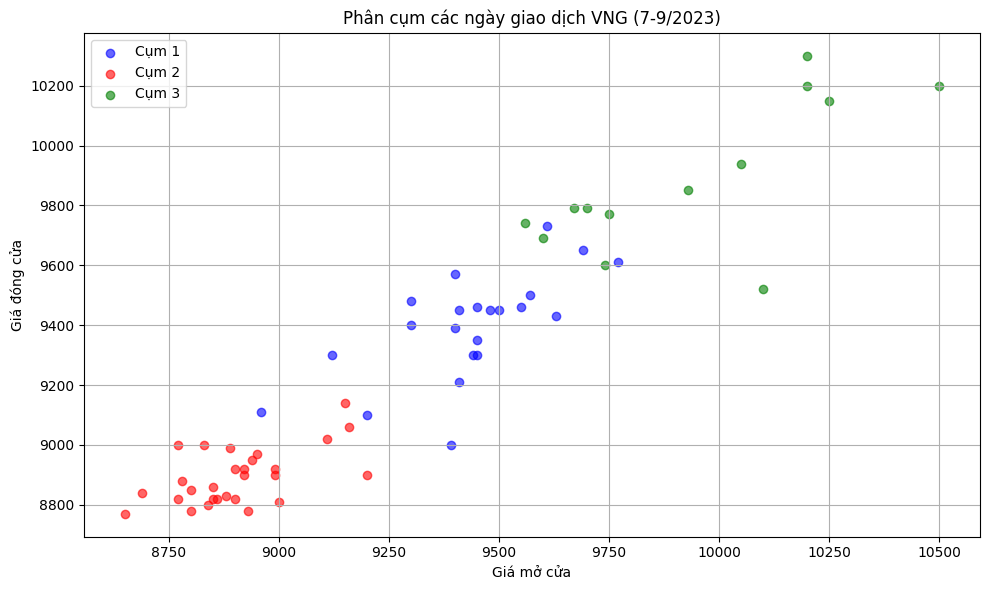

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

def doc_du_lieu(file_path=f'data_2023/transaction/{ma_co_phieu}.csv'):
    """Đọc và chuẩn bị dữ liệu từ file CSV"""
    df = pd.read_csv(file_path)
    df['time'] = pd.to_datetime(df['time'])
    # Lọc dữ liệu từ tháng 7 đến tháng 9/2023
    mask = (df['time'] >= '2023-07-01') & (df['time'] <= '2023-09-30')
    return df[mask].copy()

# Câu 5 & 6: Thêm các chỉ báo Info01 và Info02
def tinh_toan_chi_bao(df):
    """
    Thêm 2 cột thông tin:
    - Info01: So sánh Close với Open
    - Info02: So sánh Close với phiên trước
    """
    # Info01: So sánh Close với Open
    df['Info01'] = np.where(df['close'] > df['open'], 1,
                           np.where(df['close'] < df['open'], -1, 0))
    
    # Info02: So sánh với phiên trước
    df['Info02'] = np.where(df['close'] > df['close'].shift(1), 1,
                           np.where(df['close'] < df['close'].shift(1), -1, 0))
    
    # Lưu kết quả
    df.to_csv('VNG_Stock.csv', index=False)
    
    # Thống kê
    print("\nThống kê Info01 (So sánh Close - Open):")
    print(f"Số phiên tăng: {len(df[df['Info01'] == 1])}")
    print(f"Số phiên giảm: {len(df[df['Info01'] == -1])}")
    print(f"Số phiên đứng giá: {len(df[df['Info01'] == 0])}")
    
    print("\nThống kê Info02 (So sánh với phiên trước):")
    print(f"Số phiên tăng: {len(df[df['Info02'] == 1])}")
    print(f"Số phiên giảm: {len(df[df['Info02'] == -1])}")
    print(f"Số phiên đứng giá: {len(df[df['Info02'] == 0])}")
    
    return df

# Câu 7: Phân tích Volume
def phan_tich_volume(df):
    """Phân tích và vẽ biểu đồ Volume"""
    volume_tb = df['volume'].mean()
    
    plt.figure(figsize=(15, 7))
    plt.plot(df['time'], df['volume'], label='Volume giao dịch', color='blue')
    plt.axhline(y=volume_tb, color='red', linestyle='--', 
                label=f'Volume TB: {volume_tb:,.0f}')
    
    # Đánh dấu các ngày vượt TB
    df_vuot_tb = df[df['volume'] > volume_tb]
    plt.scatter(df_vuot_tb['time'], df_vuot_tb['volume'], 
               color='red', alpha=0.5, label='Vượt TB')
    
    plt.title('Phân tích Volume giao dịch VNG (7-9/2023)')
    plt.xlabel('Thời gian')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    print(f"\nVolume trung bình: {volume_tb:,.0f}")
    print(f"Số phiên vượt TB: {len(df_vuot_tb)}")
    return volume_tb

# Câu 8: Thống kê và vẽ đường giá
def phan_tich_gia(df):
    """Thống kê về giá và vẽ biểu đồ giá"""
    print("\nThống kê giá:")
    print(f"Số phiên giao dịch: {len(df)}")
    print(f"Giá đóng cửa trung bình: {df['close'].mean():,.0f}")
    print(f"Giá đóng cửa cao nhất: {df['close'].max():,.0f}")
    print(f"Giá đóng cửa thấp nhất: {df['close'].min():,.0f}")
    
    plt.figure(figsize=(15, 7))
    plt.plot(df['time'], df['open'], label='Giá mở cửa', alpha=0.7)
    plt.plot(df['time'], df['high'], label='Giá cao nhất', alpha=0.7)
    plt.plot(df['time'], df['low'], label='Giá thấp nhất', alpha=0.7)
    plt.plot(df['time'], df['close'], label='Giá đóng cửa', alpha=0.7)
    
    plt.title('Biểu đồ giá cổ phiếu VNG (7-9/2023)')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

# Câu 9: Phân tích hồi quy
def phan_tich_hoi_quy(df):
    """Phân tích hồi quy giá Close"""
    X = df[['volume', 'open', 'high', 'low']]
    y = df['close']
    
    model = LinearRegression()
    model.fit(X, y)
    
    r2 = model.score(X, y)
    print("\nKết quả phân tích hồi quy:")
    print("Hệ số hồi quy:")
    for ten, heso in zip(['Volume', 'Open', 'High', 'Low'], model.coef_):
        print(f"{ten}: {heso:.4f}")
    print(f"R-squared: {r2:.4f}")
    
    return model, r2

# Câu 10: Phân cụm K-Means
def phan_cum_kmeans(df):
    """Phân cụm các ngày giao dịch thành 3 cụm"""
    # Chuẩn hóa dữ liệu
    X = df[['volume', 'open', 'high', 'low', 'close']].values
    X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
    
    # Thực hiện K-Means
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    df['cluster'] = clusters
    
    # Vẽ biểu đồ phân cụm
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'red', 'green']
    
    for i in range(3):
        mask = clusters == i
        plt.scatter(df[mask]['open'], df[mask]['close'], 
                   c=colors[i], label=f'Cụm {i+1}', alpha=0.6)
    
    plt.title('Phân cụm các ngày giao dịch VNG (7-9/2023)')
    plt.xlabel('Giá mở cửa')
    plt.ylabel('Giá đóng cửa')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Thống kê các cụm
    print("\nThống kê các cụm:")
    for i in range(3):
        cluster_data = df[df['cluster'] == i]
        print(f"\nCụm {i+1}:")
        print(f"Số lượng phiên: {len(cluster_data)}")
        print(f"Giá trung bình: {cluster_data['close'].mean():,.0f}")
        print(f"Volume trung bình: {cluster_data['volume'].mean():,.0f}")

# Thực hiện tất cả phân tích
def phan_tich_toan_bo():
    # Đọc dữ liệu
    df = doc_du_lieu()
    
    # Thực hiện các phân tích
    df = tinh_toan_chi_bao(df)
    volume_tb = phan_tich_volume(df)
    phan_tich_gia(df)
    model, r2 = phan_tich_hoi_quy(df)
    phan_cum_kmeans(df)
    plt.show()
    
    return df

# Chạy phân tích
df_ket_qua = phan_tich_toan_bo()